In [2]:
%matplotlib inline
import plot_helpers as ph
from matplotlib import pyplot as plt

In [3]:
fairgp_files = [
    ('../results/ICML/adult/gpyt2500_dempar_race.csv', ''),
    ('../results/ICML/adult/gpyt2500_dempar_sex.csv', ''),
]
def label_change(label):
    parts = label.split('_')
    #mode = parts[-1]
    in_True = parts[4] == "True"
    optional_star = "*" if in_True else ""
    with_s = ", use $s$" if in_True else ""
    #return f"FairGPparity{optional_star}", in_True
    #return "average" if mode == "True" else mode, True
    return f"FairGP{with_s}", not in_True

fairgp = ph.parse_all(fairgp_files, label_change)

In [4]:
baselinegp_files = [
    ('../results/ICML/adult/gpyt2500_baseline_race.csv', ''),
    ('../results/ICML/adult/gpyt2500_baseline_sex.csv', ''),
]
def label_change(label):
    parts = label.split('_')
    #mode = parts[-1]
    in_True = parts[2] == "True"
    if in_True:
        return
    optional_star = "*" if in_True else ""
    with_s = ", use $s$" if in_True else ""
    #return f"FairGPparity{optional_star}", in_True
    #return "average" if mode == "True" else mode, True
    return f"GP{with_s}", not in_True

baselinegp = ph.parse_all(baselinegp_files, label_change)

In [5]:
baseline_files = [
    ('../results/parity_opp_update_2018-08-28/par_fixed/adult_race_baseline.csv', ''),
    ('../results/parity_opp_update_2018-08-28/par_fixed/adult_sex_baseline.csv', ''),
]
def label_change(label):
    algos = [
        'ZafarFairness',
        'ZafarAccuracy',
        'SVM',
#         'GP',
#         'DecisionTree',
    ]
    if label in algos:
        return label, True
    #if label == 'ZafarAccuracy':
    #    return 'baseline: Zafar', True
#     if label == 'SVM':
#         return 'baseline: SVM', True

baselines = ph.parse_all(baseline_files, label_change)

In [6]:
baselines = ph.merge_plot_defs(baselinegp, baselines)

In [7]:
# fairgp = ph.choose_entries(fairgp, [0, 5, 1, 6, 2, 7, 3, 8, 4, 9])

In [8]:
ms = 4

In [16]:
def acc_vs_di(plot, legend, *data):
    xaxis = ('DIbinary', '$PR_{s=0}\\,/\\,PR_{s=1}$')
    yaxis = ('accuracy', 'accuracy')
    legends = []
    startindex = 0

    plot.axvline(x=1.0, linestyle='--', color='k', label=None if legend is None else "perfect fairness")
    for data_structure in data:
        legends += [ph.errorbox(plot, data_structure, xaxis, yaxis, legend=legend, firstcolor=startindex // 2, firstshape=startindex)]
        startindex += len(data_structure.entries)
    if legend is not None:
        return legends

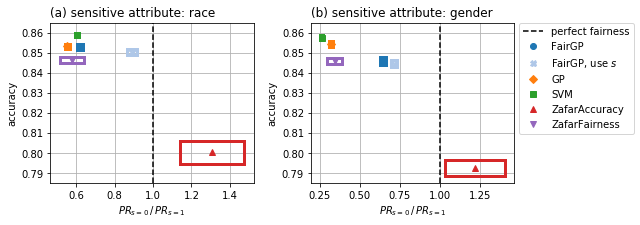

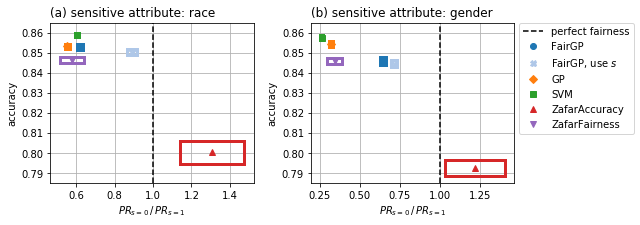

In [22]:
fig, plots = plt.subplots(ncols=2, figsize=(9, 2.6))
acc_vs_di(plots[0], None, fairgp[0], baselines[0])
plots[0].set_title("(a) sensitive attribute: race", loc='left')
plots[0].set_ylim(0.785, 0.865)
# plots[0].set_xlim(0.07, 0.38)
legends = acc_vs_di(plots[1], ('outside', 1.03), fairgp[1], baselines[1])
plots[1].set_title("(b) sensitive attribute: gender", loc='left')
plots[1].set_ylim(0.785, 0.865)

fig.tight_layout()
fig.subplots_adjust(bottom=0)
fig.savefig("/Users/tk324/dev/latex/Tunable_Fairness_ICML/figures/adult_parity_box.pdf",
            dpi=200, bbox_extra_artists=legends, bbox_inches='tight', pad_inches=0)
fig